In [23]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import os

from datetime import datetime
from scipy import stats

cwd = os.getcwd()

parent = os.path.dirname(cwd)

parent

'/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project'

In [14]:
df = pd.read_csv(os.path.join(parent+r"/data/review_data_no_text_2022",r"tripadvisor_ratings.csv"),sep=',',header=0,infer_datetime_format=True,parse_dates=['Review Date'])



In [15]:
df["post_month"] = df["Review Date"].dt.to_period('M')

In [16]:
df = df.sort_values(['URL','Review Date'],ascending=True)

In [18]:
df['cummulative_mean'] = (
    df.groupby('URL')['Review Rating'].apply(lambda x: x.shift().expanding().mean()))

In [20]:
df = df.dropna()

In [26]:
count_stat = stats.binned_statistic(df["cummulative_mean"], df["cummulative_mean"], 
                             statistic='count', 
                             bins=80,
                         range=[1, 5])
mc_test = pd.DataFrame()
mc_test["bin"] = count_stat.bin_edges[1:]
mc_test["count"] = count_stat.statistic[0:]

In [37]:
mc_test

,bin,count,density,up
0,1.05,433.0,0.000116,False
1,1.10,27.0,0.000007,False
2,1.15,53.0,0.000014,False
3,1.20,41.0,0.000011,False
4,1.25,43.0,0.000012,True
...,...,...,...,...
75,4.80,39755.0,0.010660,False
76,4.85,17913.0,0.004803,False
77,4.90,11654.0,0.003125,False
78,4.95,6298.0,0.001689,False


In [44]:
mc_test["up"] = mc_test["up"].astype(str)

In [49]:
mc_test["up"] = mc_test["up"].replace('False','Not Round Up Bin')

In [50]:
mc_test["up"] = mc_test["up"].replace('True','Round Up Bin')

In [45]:
groups = mc_test.groupby('up')

In [46]:
groups.groups

{'False': [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79], 'True': [4, 5, 14, 15, 24, 25, 34, 35, 44, 54, 64, 74]}

Text(0, 0.5, 'Density of reviews in 0.05-rating bin')

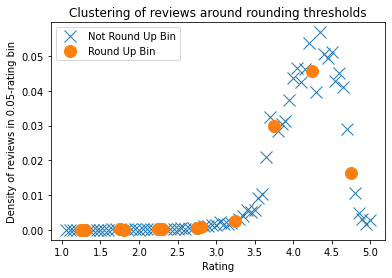

In [55]:
from itertools import cycle
groups = mc_test.groupby('up')

markers = ['x', 'o']

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for (name, group), marker in zip(groups, cycle(markers)):
    ax.plot(group.bin, group.density, marker=marker, linestyle='', ms=12, label=name)
ax.legend()

plt.title('Clustering of reviews around rounding thresholds')
plt.xlabel("Rating")
plt.ylabel("Density of reviews in 0.05-rating bin")

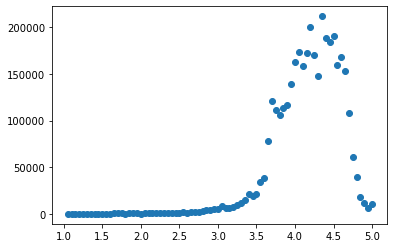

In [28]:
plt
.scatter(mc_test["bin"], mc_test["count"])

In [29]:
mc_test["density"] = mc_test["count"]/len(df)

In [30]:
mc_test["up_1"] = (((mc_test["bin"]>=1.25)&(mc_test["bin"]<=1.3))|\

                ((mc_test["bin"]>=1.75)&(mc_test["bin"]<=1.8))|\
                
                ((mc_test["bin"]>=2.25)&(mc_test["bin"]<=2.3))|\

                ((mc_test["bin"]>=2.75)&(mc_test["bin"]<=2.8))|\
                ((mc_test["bin"]>=3.25)&(mc_test["bin"]<=3.3))|\

                ((mc_test["bin"]>=3.75)&(mc_test["bin"]<=3.8))|\
                
                ((mc_test["bin"]>=4.25)&(mc_test["bin"]<=4.3))|\

                ((mc_test["bin"]>=4.75)&(mc_test["bin"]<=4.8)))

In [ ]:
mc_test["up_2"] = (((mc_test["bin"]>=1.25)&(mc_test["bin"]<=1.35))|\

                ((mc_test["bin"]>=1.75)&(mc_test["bin"]<=1.85))|\
                
                ((mc_test["bin"]>=2.25)&(mc_test["bin"]<=2.35))|\

                ((mc_test["bin"]>=2.75)&(mc_test["bin"]<=2.85))|\
                ((mc_test["bin"]>=3.25)&(mc_test["bin"]<=3.35))|\

                ((mc_test["bin"]>=3.75)&(mc_test["bin"]<=3.85))|\
                
                ((mc_test["bin"]>=4.25)&(mc_test["bin"]<=4.35))|\

                ((mc_test["bin"]>=4.75)&(mc_test["bin"]<=4.85)))

In [ ]:
mc_test["up_3"] = (((mc_test["bin"]>=1.25)&(mc_test["bin"]<=1.4))|\

                ((mc_test["bin"]>=1.75)&(mc_test["bin"]<=1.9))|\
                
                ((mc_test["bin"]>=2.25)&(mc_test["bin"]<=2.4))|\

                ((mc_test["bin"]>=2.75)&(mc_test["bin"]<=2.9))|\
                ((mc_test["bin"]>=3.25)&(mc_test["bin"]<=3.4))|\

                ((mc_test["bin"]>=3.75)&(mc_test["bin"]<=3.9))|\
                
                ((mc_test["bin"]>=4.25)&(mc_test["bin"]<=4.4))|\

                ((mc_test["bin"]>=4.75)&(mc_test["bin"]<=4.9)))

In [32]:
from statsmodels.api import add_constant
from linearmodels import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import statsmodels.api as sm
import statsmodels
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

x_1 =  mc_test["up"]
x_1 = sm.add_constant(x)
model = sm.OLS(mc_test["density"], x_1["up"])
results_1 = model.fit()

In [35]:
res_main = summary_col([results_mc], float_format = '%.3f', \
                  model_names = ["fraction of hotel-month observations in 0.05 rating bin",\
                                 ],\
                 regressor_order = ["up",\
                                   "const",\
                                    
                                  
                                  ],\
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                           'Adjusted R-squared':lambda x: "{:.2f}".format(x.rsquared_adj)},\
                  stars = True,drop_omitted=True)


beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

output_dir = r"/Users/juju/Library/Mobile Documents/com~apple~CloudDocs/ta_project/output/ch1"
f = open(os.path.join(output_dir,'mc_test.tex'), 'w')
f.write(beginningtex)
f.write(res_main.as_latex())
f.write(endtex)
f.close()